 # <font color=army>World Suicide Rate</font>

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import os 
import pandas as pd
from scipy import stats
import plotly.express as px

In [3]:
df=pd.read_csv(r'master.csv')
pd.set_option('display.max_columns', None)
df

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  HDI for year  gdp_for_year ($)   \
0                   6.71     Albania1987           NaN      2,156,624,900   
1                   5.19     Albania1987           NaN      2,156,624,900   
2                   4.83     Albania1987           NaN      2,156,624,900   
3                   4.59     Albania1987           NaN      2,156,624,900   
4                   3.28     Albania1987           NaN      2,156,624,900   
...                  ...             ...           ...                ...   
27815               2.96  Uzbekistan2014         0.675     63,067,077,179   
27816               2.58  Uzbekistan2014         0.675     63,067,077,179   
27817               2.17  Uzbekistan2014         0.675     63,067,077,179   
27818               1.67  Uzbekistan2014         0.675     63,067,077,179   
27819               1.46  Uzbekistan2014         0.675     63,067,077,179   

       gdp_per_capita ($)       generation  
0                     796     Generation X  
1                     796           Silent  
2                     796     Generation X  
3                     796  G.I. Generation  
4                     796          Boomers  
...                   ...              ...  
27815                2309     Generation X  
27816                2309           Silent  
27817                2309     Generation Z  
27818                2309     Generation Z  
27819                2309          Boomers  

[27820 rows x 12 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


### Data Cleaning
~Data 2016 dihapus karena data sangat sedikit (dan hanya ada data dari 16 country)
~HDI dihapus karena 2/3 data missing

In [5]:
df = df.drop('HDI for year', axis=1)
df = df[df['year']<2016]
df=df.drop(df[df['country']=='Cabo Verde'].index)
df

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27815  Uzbekistan  2014  female  35-54 years          107     3620833   
27816  Uzbekistan  2014  female    75+ years            9      348465   
27817  Uzbekistan  2014    male   5-14 years           60     2762158   
27818  Uzbekistan  2014  female   5-14 years           44     2631600   
27819  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicides/100k pop    country-year  gdp_for_year ($)   \
0                   6.71     Albania1987      2,156,624,900   
1                   5.19     Albania1987      2,156,624,900   
2                   4.83     Albania1987      2,156,624,900   
3                   4.59     Albania1987      2,156,624,900   
4                   3.28     Albania1987      2,156,624,900   
...                  ...             ...                ...   
27815               2.96  Uzbekistan2014     63,067,077,179   
27816               2.58  Uzbekistan2014     63,067,077,179   
27817               2.17  Uzbekistan2014     63,067,077,179   
27818               1.67  Uzbekistan2014     63,067,077,179   
27819               1.46  Uzbekistan2014     63,067,077,179   

       gdp_per_capita ($)       generation  
0                     796     Generation X  
1                     796           Silent  
2                     796     Generation X  
3                     796  G.I. Generation  
4                     796          Boomers  
...                   ...              ...  
27815                2309     Generation X  
27816                2309           Silent  
27817                2309     Generation Z  
27818                2309     Generation Z  
27819                2309          Boomers  

[27648 rows x 11 columns]

In [6]:
df.rename(columns={'suicides/100k pop':'suicide_rate', "HDI for year":"HDI_for_year", ' gdp_for_year ($) ':'gdp_for_year', 'gdp_per_capita ($)':'gdp_per_capita'}, inplace=True)
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicide_rate', 'country-year', 'gdp_for_year', 'gdp_per_capita',
       'generation'],
      dtype='object')

In [7]:
df["gdp_for_year"] = df["gdp_for_year"].str.replace(",","").astype(np.int64)
df.head()

country  year     sex          age  suicides_no  population  suicide_rate  \
0  Albania  1987    male  15-24 years           21      312900          6.71   
1  Albania  1987    male  35-54 years           16      308000          5.19   
2  Albania  1987  female  15-24 years           14      289700          4.83   
3  Albania  1987    male    75+ years            1       21800          4.59   
4  Albania  1987    male  25-34 years            9      274300          3.28   

  country-year  gdp_for_year  gdp_per_capita       generation  
0  Albania1987    2156624900             796     Generation X  
1  Albania1987    2156624900             796           Silent  
2  Albania1987    2156624900             796     Generation X  
3  Albania1987    2156624900             796  G.I. Generation  
4  Albania1987    2156624900             796          Boomers

In [8]:
def visualization(Title = None, xlabel = None, ylabel= None, xTitle= None):
    fig = plt.figure()
    plt.style.use(['fivethirtyeight'])
    axes = fig.add_axes([0.3, 0.1, 1, 0.8])
    if Title == 'Global Suicides':
        axes.plot(xlabel, ylabel, color = 'navy', linewidth=3, ls='--')
    elif Title == 'Gender & Suicides':
        axes.bar(xlabel, ylabel, color = ['crimson', 'navy'], linewidth=3)
    else:
        axes.bar(xlabel, ylabel, color = 'navy', linewidth=3)
    axes.set_xlabel(xTitle, fontsize=12)
    axes.set_ylabel('suicide_rate', fontsize=12)
    axes.set_title(Title, fontsize=15)
    if Title == 'Age & Suicides':
        plt.xticks(fontsize=10.5)
        axes.set_xticklabels(('5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'))
    if Title == 'Gender & Suicides':
        plt.xticks(fontsize=15)
    return axes

In [9]:
df_year = df.drop(['country', 'sex', 'age', 'country-year', 'gdp_for_year', 'gdp_per_capita', 'generation'], axis=1)
# group data berdasarkan tahun
year_group = df_year.groupby(['year'], as_index=False).sum()
# reset suicide rate
year_group['suicide_rate'] = (year_group['suicides_no'] / year_group['population']) * 100000
year_group.head()

year  suicides_no  population  suicide_rate
0  1985       116063  1008600086     11.507336
1  1986       120670  1029909613     11.716562
2  1987       126842  1095029726     11.583430
3  1988       121026  1054094424     11.481514
4  1989       160244  1225514347     13.075653

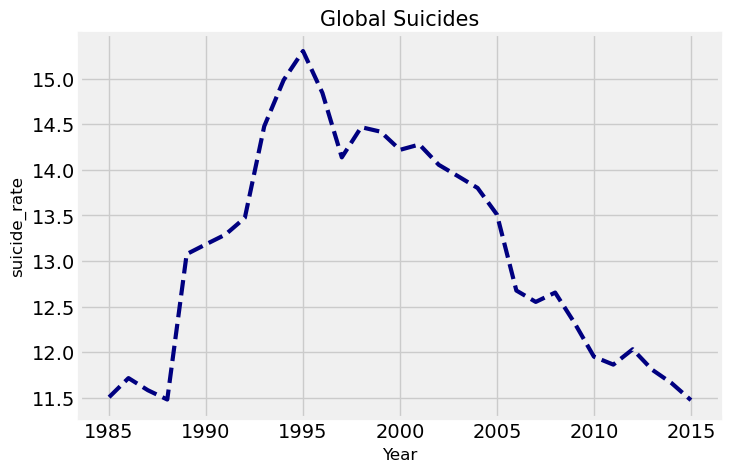

In [10]:
year_visualization = visualization(Title= 'Global Suicides',xlabel=year_group['year'], ylabel=year_group['suicide_rate'], xTitle='Year')


>Tingkat puncak bunuh diri terjadi pada tahun 1995  yaitu sekitar 15,3 kematian per 100 ribu orang                                               
>Kemudian mangalami penurunan, di bawah angka 12 (sekitar 11.5) per 100rb pada tahun 2015 (±25% penurunan)                                    
>Dan untuk tahun sekarang dapat kita lihat bahwa trend kembali seperti sebelum tahun 90-an                                        
>Data terbatas di tahun 1980-an, jadi sulit untuk mengatakan apakah tingkat itu benar-benar mewakili populasi global

### b. Tren berdasarkan benua

In [17]:
df_continent=pd.read_csv(r'continents2 (tambahan untuk mengelompokkan negara ke dalam region).csv')
pd.set_option('display.max_columns', None)

In [18]:
def mismatch (series_1, series_2, only_out=True):
    out_num = 0
    for i in series_1.unique():
        if i in series_2.unique():
# jika ada(series_2.unique() == i): # alternatif
            if not only_out:
                print("in :",i)
        else:
            print("out :",i)
            out_num += 1
    print(f"{out_num} mismatch(es) between those dataframes".upper())
    
mismatch(df.country, df_continent.name, True)

out : Bosnia and Herzegovina
out : Macau
out : Republic of Korea
out : Russian Federation
out : Saint Vincent and Grenadines
5 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [19]:
df_continent.loc[df_continent.name.str.contains("Bosnia"),'name']='Bosnia and Herzegovina'
df_continent.loc[df_continent.name.str.contains("Maca"),'name']='Macau'
df_continent.loc[df_continent.name.str.contains("Korea, Republic of"),'name']='Republic of Korea'
df_continent.loc[df_continent.name.str.contains("Russia"),'name']='Russian Federation'
df_continent.loc[df_continent.name.str.contains("Vincent"),'name']='Saint Vincent and Grenadines'
mismatch(df.country, df_continent.name, True)

0 MISMATCH(ES) BETWEEN THOSE DATAFRAMES


In [20]:
df = df.merge(df_continent[['name','region','sub-region','alpha-3']], left_on='country', right_on='name')
df

country  year     sex          age  suicides_no  population  \
0         Albania  1987    male  15-24 years           21      312900   
1         Albania  1987    male  35-54 years           16      308000   
2         Albania  1987  female  15-24 years           14      289700   
3         Albania  1987    male    75+ years            1       21800   
4         Albania  1987    male  25-34 years            9      274300   
...           ...   ...     ...          ...          ...         ...   
27643  Uzbekistan  2014  female  35-54 years          107     3620833   
27644  Uzbekistan  2014  female    75+ years            9      348465   
27645  Uzbekistan  2014    male   5-14 years           60     2762158   
27646  Uzbekistan  2014  female   5-14 years           44     2631600   
27647  Uzbekistan  2014  female  55-74 years           21     1438935   

       suicide_rate    country-year  gdp_for_year  gdp_per_capita  \
0              6.71     Albania1987    2156624900             796   
1              5.19     Albania1987    2156624900             796   
2              4.83     Albania1987    2156624900             796   
3              4.59     Albania1987    2156624900             796   
4              3.28     Albania1987    2156624900             796   
...             ...             ...           ...             ...   
27643          2.96  Uzbekistan2014   63067077179            2309   
27644          2.58  Uzbekistan2014   63067077179            2309   
27645          2.17  Uzbekistan2014   63067077179            2309   
27646          1.67  Uzbekistan2014   63067077179            2309   
27647          1.46  Uzbekistan2014   63067077179            2309   

            generation        name  region       sub-region alpha-3  
0         Generation X     Albania  Europe  Southern Europe     ALB  
1               Silent     Albania  Europe  Southern Europe     ALB  
2         Generation X     Albania  Europe  Southern Europe     ALB  
3      G.I. Generation     Albania  Europe  Southern Europe     ALB  
4              Boomers     Albania  Europe  Southern Europe     ALB  
...                ...         ...     ...              ...     ...  
27643     Generation X  Uzbekistan    Asia     Central Asia     UZB  
27644           Silent  Uzbekistan    Asia     Central Asia     UZB  
27645     Generation Z  Uzbekistan    Asia     Central Asia     UZB  
27646     Generation Z  Uzbekistan    Asia     Central Asia     UZB  
27647          Boomers  Uzbekistan    Asia     Central Asia     UZB  

[27648 rows x 15 columns]

In [21]:
print('Unique Values of Features:\n')
for i in ['country','region','sub-region','age','generation','sex','year']:
    print(f'{i}:\n{sorted(df[i].unique())}\n')

Unique Values of Features:

country:
['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador', 'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary', 'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia', 'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Montenegro', 'Netherlands', 'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea', 'Romania', 'Russian Federation', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and Grenadines', 

Text(0.5, 1.0, 'Suicide Rates by Regions')

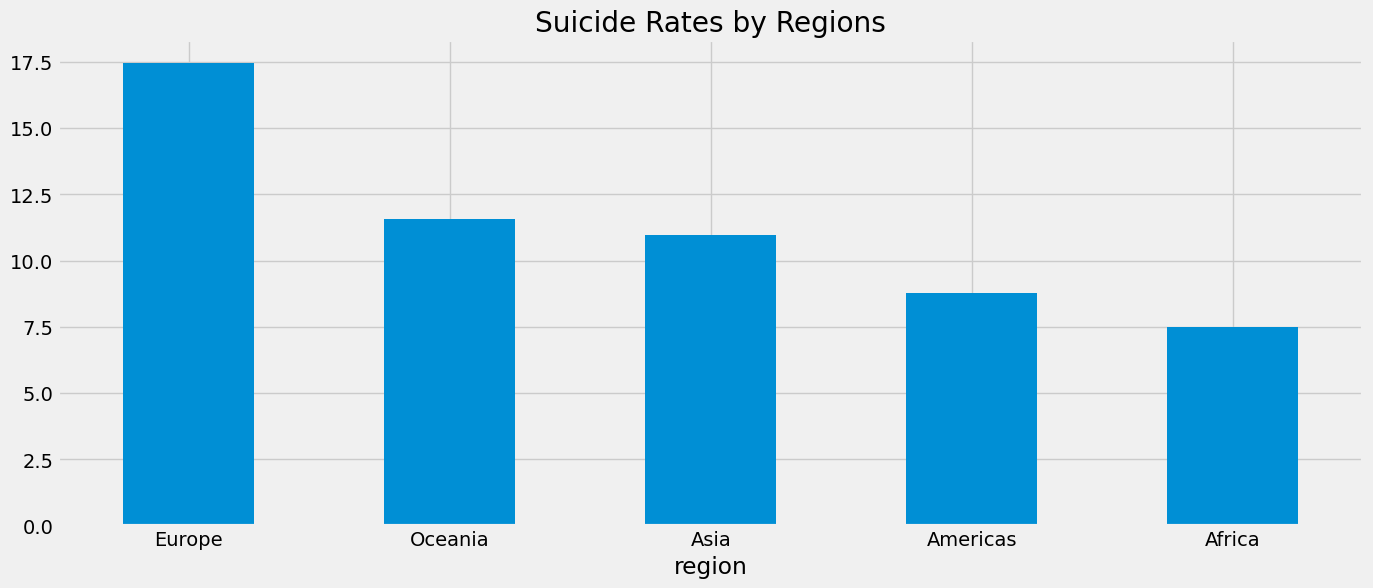

In [22]:
plt.subplots(figsize=(15,6))
df.groupby('region').suicide_rate.mean().sort_values(ascending=False).plot.bar(rot=0)
plt.title("Suicide Rates by Regions")

Text(0.5, 1.0, 'Tren Bunuh Diri Setiap Tahunnya Berdasarkan Regionnya')

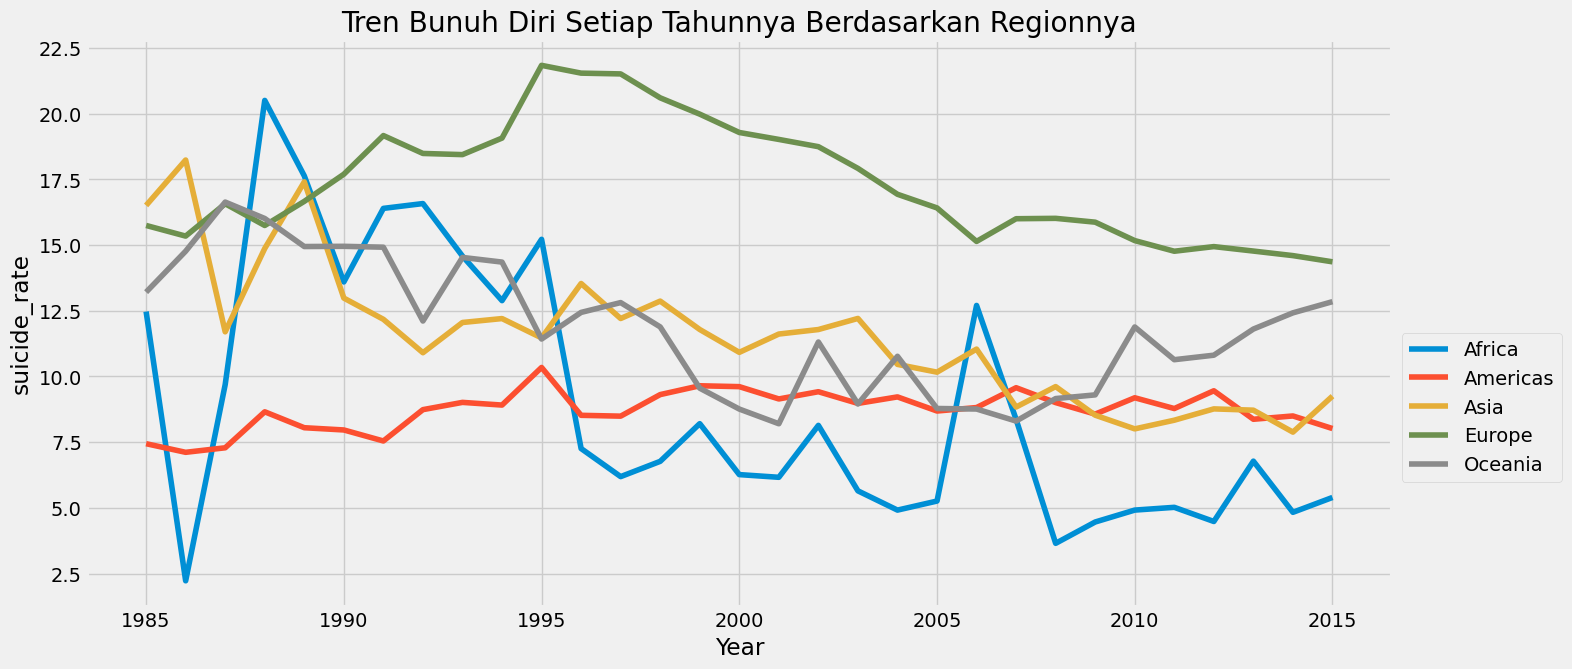

In [23]:
plt.figure(figsize=(15,7))
dfgdr = df.groupby(['region', 'year']).agg(suicide_rate=('suicide_rate', np.mean))
dfgr= sns.lineplot(data=dfgdr, x="year", y="suicide_rate", hue="region")
dfgr.set_xlabel ("Year")
dfgr.set_ylabel ("suicide_rate")
dfgr.legend(bbox_to_anchor=(1, 0.5))
dfgr.set_title("Tren Bunuh Diri Setiap Tahunnya Berdasarkan Regionnya")

~ Eropa memiliki tingkat bunuh diri tertinggi secara keseluruhan, tetapi terus menurun sejak 1995              
~ Pada tahun 2015 Amerika memiliki angka bunuh diri yang hampir serupa dengan Asia                                 
~ Tren bunuh diri di Oceania memprihatinkan karena regions ini mengalami penigkatan bunuh diri.                

In [25]:
df_gender = df.drop(['country', 'age', 'country-year', 'year','gdp_for_year', 'gdp_per_capita', 'generation'], axis=1)
gender_group = df_gender.groupby(['sex'], as_index=False).sum()
gender_group['suicide_rate'] = (gender_group['suicides_no'] / gender_group['population']) * 100000
gender_group.head()

sex  suicides_no   population  suicide_rate
0  female      1556001  26205185686       5.93776
1    male      5176774  24984418675      20.72001

Mengapa pria memiliki tingkat bunuh diri yang lebih tinggi daripada wanita?
<br>sumber: bbc (https://www.bbc.com/indonesia/vert-fut-47862671)
<br><br>Ringkasan: Wanita lebih sering melakukan percobaan bunuh diri daripada pria tetapi metode bunuh diri pria seringkali lebih kejam, sehingga waktu yang dibutuhkan laki-laki untuk mati sangat singkat sebelum ada yang bisa campur tangan. Akses ke sarana adalah faktor yang berkontribusi besar: di AS misalnya, enam dari 10 pemilik senjata adalah laki-laki – dan senjata api bertanggung jawab atas lebih dari setengah kasus bunuh diri.


Text(0.5, 1.0, 'Tren Bunuh Diri Berdasarkan Gender')

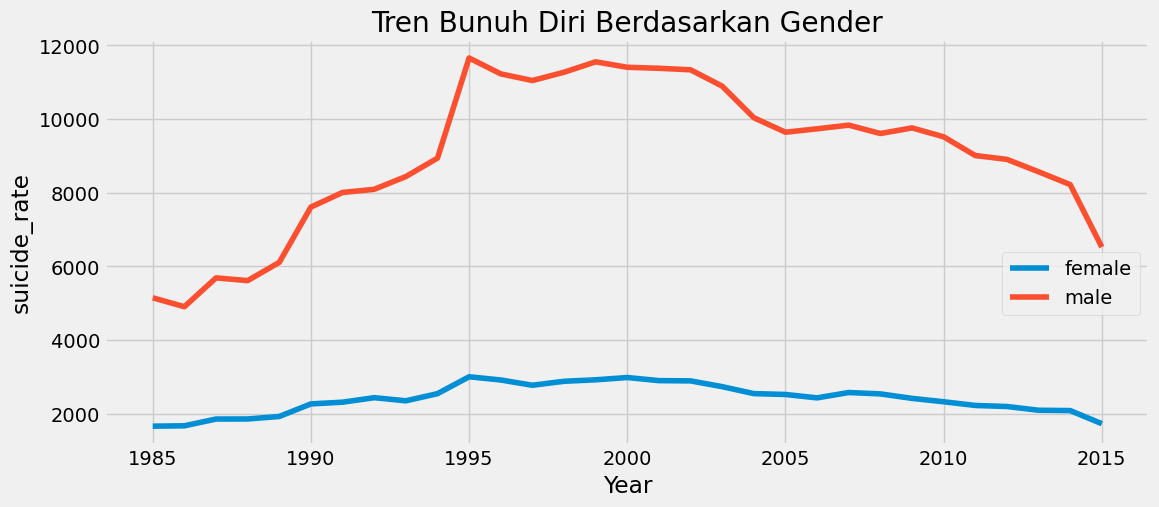

In [26]:
plt.figure(figsize=(12,5))
dfgdr = df.groupby(['sex', 'year']).agg(suicide_rate=('suicide_rate', np.sum))
dfgr= sns.lineplot(data=dfgdr, x="year", y="suicide_rate", hue="sex")
dfgr.set_xlabel ("Year")
dfgr.set_ylabel ("suicide_rate")
dfgr.legend(bbox_to_anchor=(1, 0.5))
dfgr.set_title('Tren Bunuh Diri Berdasarkan Gender')

~ Secara global, tingkat bunuh diri pria ±3,5x lebih tinggi daripada wanita.        
~ Tingkat bunuh diri pria & wanita mencapai puncaknya pada tahun 1995, dan setelah itu menurun.          
~ Rasio 3,5 : 1 (pria: wanita) relatif konstan sejak pertengahan 90-an

In [27]:
df['age'] = df['age'].replace({'5-14 years': '1', '15-24 years': '2', '25-34 years': '3', '35-54 years': '4', '55-74 years': '5', '75+ years': '6'})
df_age = df.drop(['country', 'sex', 'year', 'country-year', 'gdp_for_year', 'gdp_per_capita', 'generation'], axis=1)
age_group = df_age.groupby(['age'], as_index=False).sum()
age_group['suicide_rate'] = (age_group['suicides_no'] / age_group['population']) * 100000

/var/folders/j0/969bldp106n9gyfy96vxbhhc0000gn/T/ipykernel_3127/27164634.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(('5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years'))


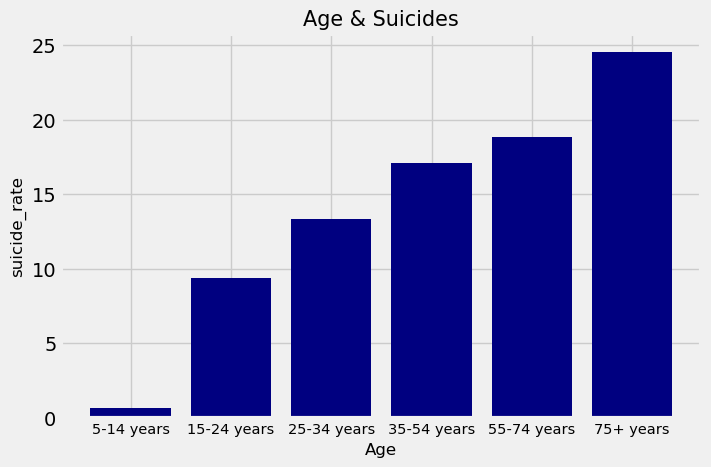

In [28]:
age_visualization = visualization(Title= 'Age & Suicides',xlabel=age_group['age'], ylabel=age_group['suicide_rate'], xTitle='Age')


Mengapa orang tua melakukan bunuh diri?
<br> ~Orang dewasa yang tua melakukan bunuh diri dipicu oleh hilangnya kendali mereka karena kondisi kesehatannya ataupun akibat keadaan keuangan yang mengakibatkan perasaan putus asa.
Mengapa remaja/orang yang masih muda melakukan bunuh diri?
<br> ~Kegagalan akademik
<br> ~Ditangkap atau dipenjara
<br> ~Bullying, dipermalukan, atau penghinaan, termasuk cyberbullying
<br> ~Masalah keuangan
<br> ~Akhir dari persahabatan dekat atau hubungan romantis
<br> ~kehilangan pekerjaan
<br> ~Tidak diterima teman atau keluarga karena mengungkapkan orientasi seksual
<br> ~Kehilangan status sosial

Text(0.5, 1.0, 'Tren Bunuh Diri Berdasarkan Umur')

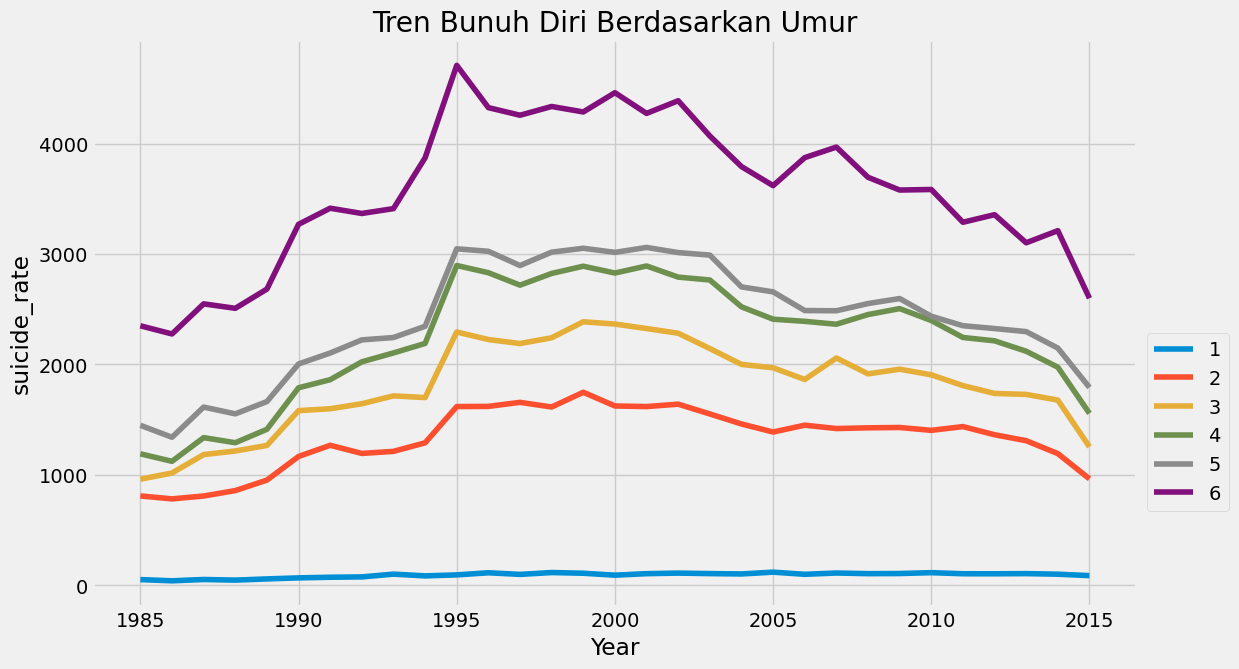

In [29]:
plt.figure(figsize=(12,7))
dfgdr = df.groupby(['age', 'year']).agg(suicide_rate=('suicide_rate', np.sum))
dfgr= sns.lineplot(data=dfgdr, x="year", y="suicide_rate", hue="age")
dfgr.set_xlabel ("Year")
dfgr.set_ylabel ("suicide_rate")
dfgr.legend(bbox_to_anchor=(1, 0.5))
dfgr.set_title('Tren Bunuh Diri Berdasarkan Umur')

~Secara global, kemungkinan bunuh diri meningkat seiring bertambahnya usia                        
~Sejak 1995, angka bunuh diri untuk semua orang berusia >= 15 tahun telah menurun          
~Tingkat bunuh diri mereka yang berusia 75+ telah turun sekitar 50% sejak 1995           
~Tingkat bunuh diri dalam kategori '5-14' secara kasar tetap statis dan kecil

In [30]:
plt.figure(figsize=(12,7))
age = df.loc[:,['year','age','suicides_no']]
age['total_suicides'] = age.groupby(['year','age'])['suicides_no'].transform('sum')
age.drop('suicides_no', axis=1, inplace=True)
age = age.drop_duplicates()
age = age[age['year']>=2000]
age = age.sort_values("year")
fig=px.bar(age,x='age', y="total_suicides", animation_frame="year", 
           animation_group="age", color="age", hover_name="age", title="Jumlah Bunuh Diri Berdasarkan Usia Sejak Tahun 2000")
fig.show()

<Figure size 1200x700 with 0 Axes>

Walaupun rentang umur 75+ merupakan rentang umur dengan tingkat bunuh diri yang tinggi tapi dari tahun ke tahun rentang umur 35-54 memiliki jumlah bunuh diri yang lebih besar dibandingkan dengan rentang umur lainnya.

### e. Generation

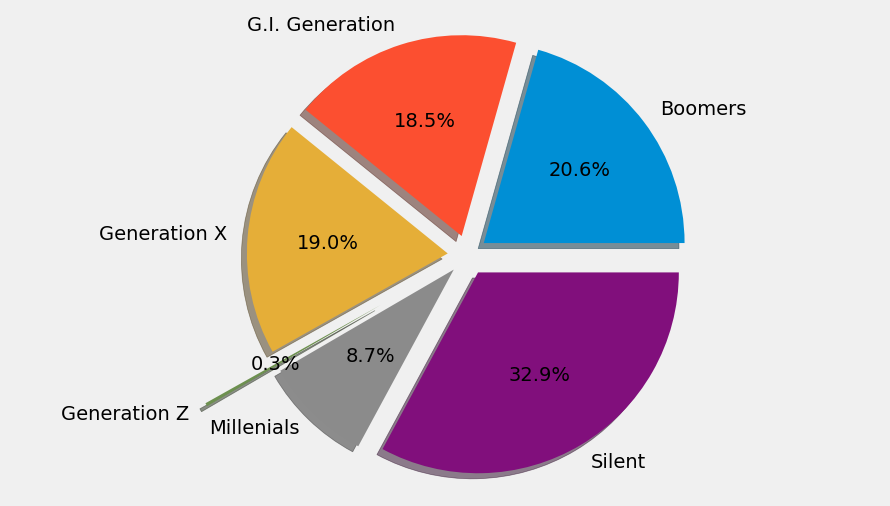

In [31]:
gen_sui = df.pivot_table('suicide_rate', index='generation', aggfunc='sum')
x = gen_sui.index.values
y = gen_sui.values
y = y.reshape(6,)

fig, ax = plt.subplots(figsize=(10, 6))
explode = (0.1,0.1,0.1,0.5,0.1,0.1)
ax.pie(y, explode=explode, labels=x, autopct='%1.1f%%', shadow=True, startangle=0)
ax.axis('equal')
plt.show()

Masyarakat yang masuk dalam generasi Silent lahir antara tahun 1925-1945. Mereka terlahir saat the great depression dimana terjadi banyak krisis global. Silent generation merasakan banyak kejadian yang mengubah dunia. Salah satunya adalah terlibat dengan Perang Dunia II. Ini bisa menjadi alasan tingginya tingkat bunuh diri pada generasi tersebut. (https://lifestyle.kontan.co.id/news/ini-6-generasi-yang-ada-di-masyarakat-ada-generasi-x-milenial-z-apa-artinya?page=all)

### f. Country

In [32]:
dfctr=df.groupby('country').agg(suicide_rate=('suicide_rate', np.mean)).sort_values('suicide_rate', ascending=False).reset_index()

Text(0.5, 1.0, 'Tingkat Bunuh Diri Setiap Negara')

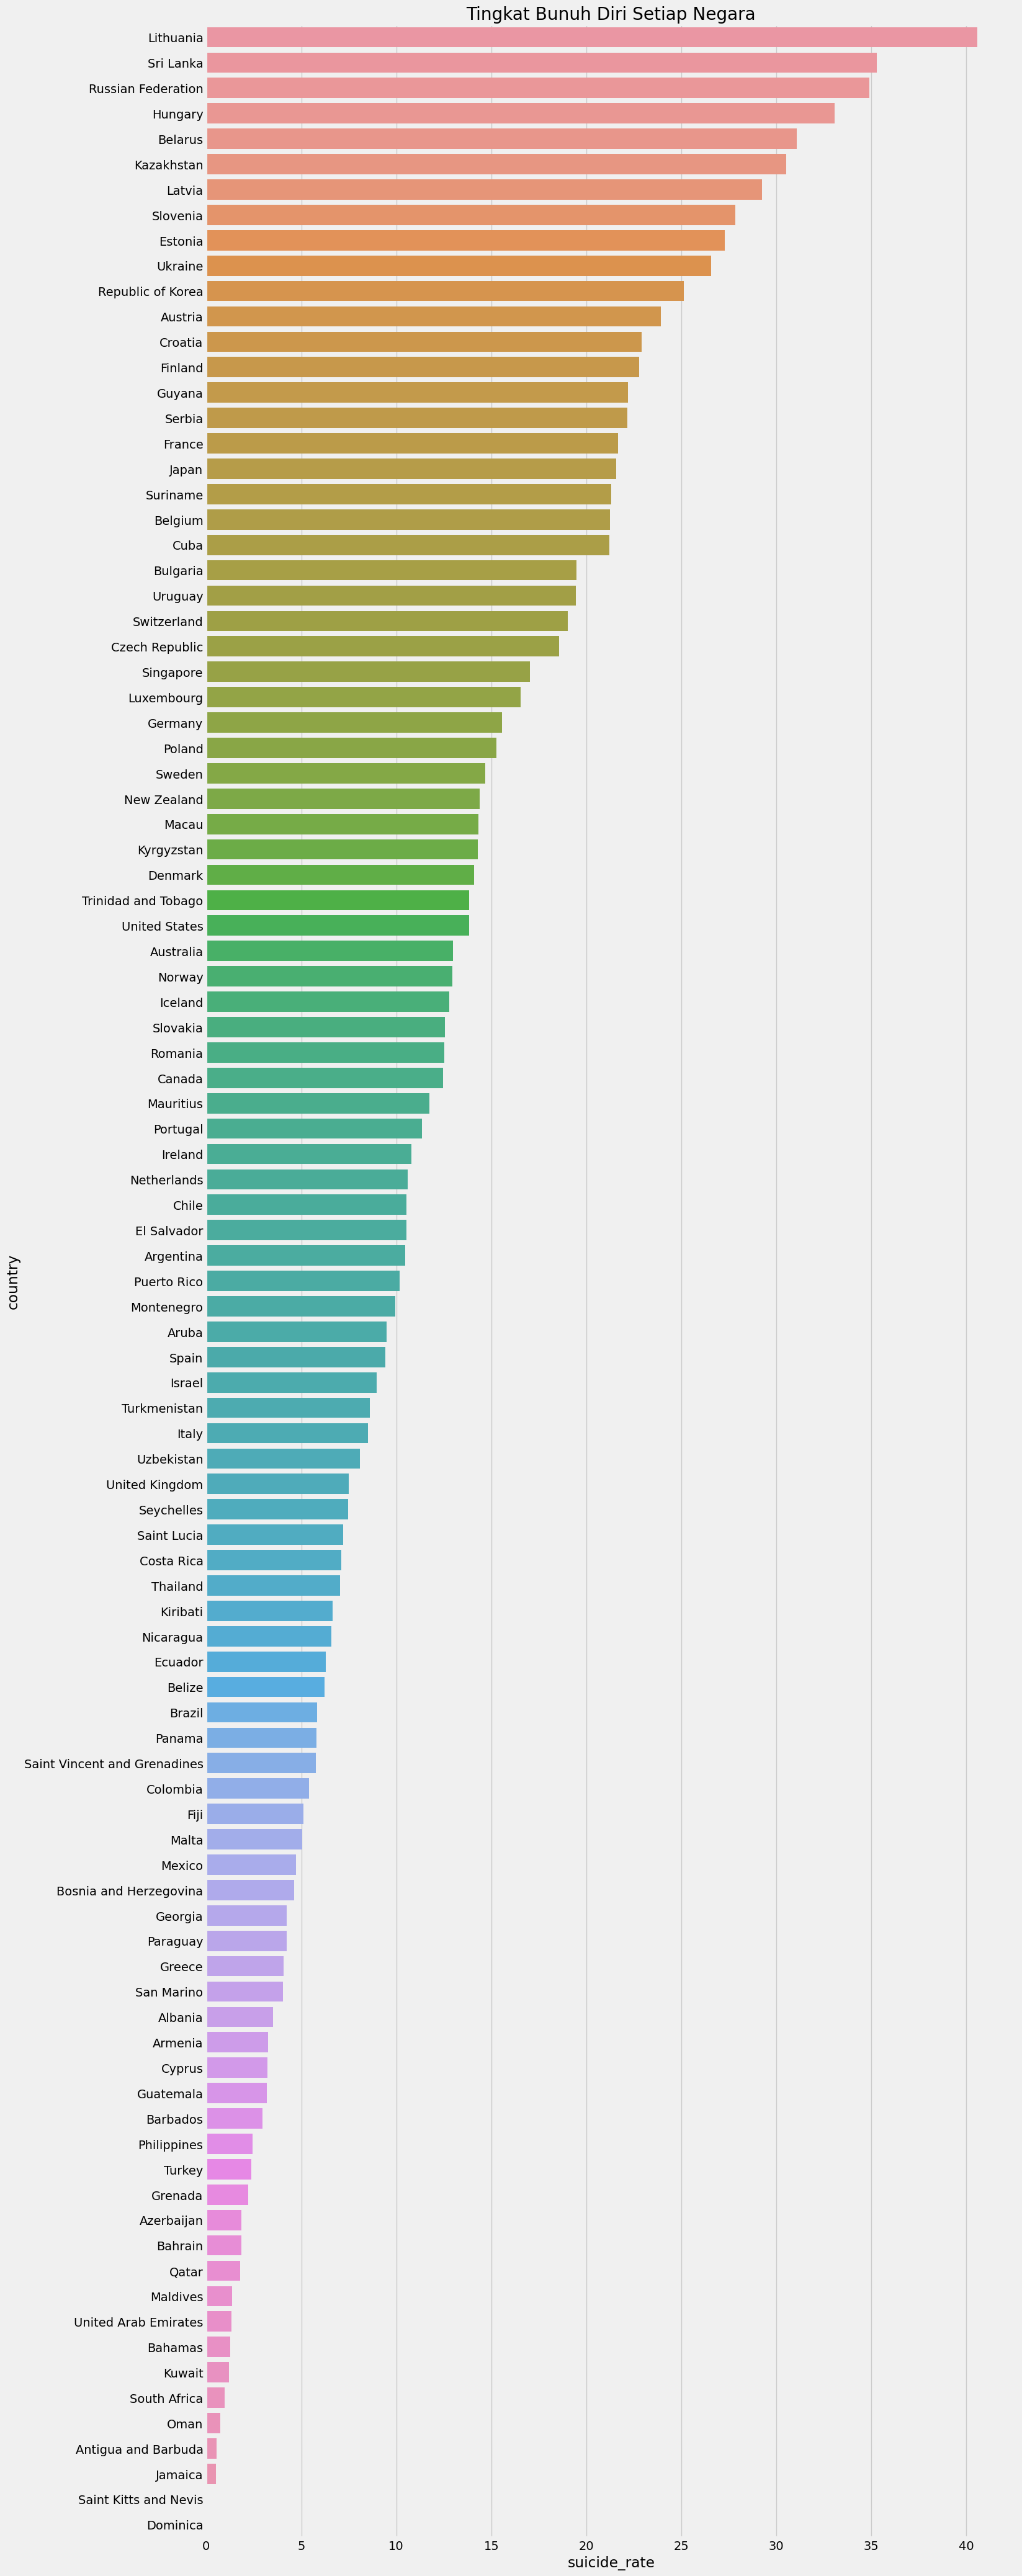

In [33]:
plt.figure(figsize=(15,50))
ax = sns.barplot(x="suicide_rate", y="country", capsize=.1, data=dfctr)
ax.set_title('Tingkat Bunuh Diri Setiap Negara')

~Tingkat bunuh diri Lithuania merupakan tingkat bunuh diri yang tertinggi diantara negara lainnya yaitu lebih dari 41 per 100 ribu kasus bunuh diri (per tahun)   
~ Mengapa tingkat bunuh diri Lithuania jauh lebih tinggi daripada di negara lain???
resesi ekonomi, alkoholisme, kurangnya toleransi dalam masyarakat, intimidasi (https://en.wikipedia.org/wiki/Suicide_in_Lithuania)


In [35]:
import plotly.express as px
data_map = df.groupby(by=['country']).agg({"suicides_no": ['sum']})
data_map.columns = ['total_suicide']
data_map.reset_index(inplace=True)
data_map

fig = px.choropleth(data_map, locations="country", locationmode='country names',
                    color="total_suicide", # lifeExp is a column of gapminder
                    hover_name="country", # column to add to hover information
                    color_continuous_scale='sunset')

fig.update_layout(
    title="Bunuh Diri Berdasarkan Negara di Peta (1985 - 2015)",
    font=dict(
        family="Courier New, monospace",
        size=15,
        color="RebeccaPurple"
    )
)
fig.show()

#### Africa

In [36]:
dfAfrica=df[df['region']=='Africa']
gdp_suicidesAfrica = dfAfrica.groupby(['year', 'country'])[['suicide_rate']].sum().reset_index()
fig = px.line(gdp_suicidesAfrica, x='year', y='suicide_rate', color='country' )
fig.update_layout(title={
                  'text': "Tren bunuh diri di Afrika",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'}, 
                  template='plotly_white', 
                  height=600,
                  xaxis_title="Year", 
                  yaxis_title="Suicides Rate",
                  showlegend=False)

#### Europe

In [37]:
dfEurope=df[df['region']=='Europe']
gdp_suicidesEurope = dfEurope.groupby(['year', 'country'])[['suicide_rate']].sum().reset_index()
fig = px.line(gdp_suicidesEurope, x='year', y='suicide_rate', color='country' )
fig.update_layout(title={
                  'text': "Tren bunuh diri di Europe",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'}, 
                  template='plotly_white', 
                  height=600,
                  xaxis_title="Year", 
                  yaxis_title="Suicides Rate",
                  showlegend=False)

#### Asia

In [38]:
dfAsia=df[df['region']=='Asia']
gdp_suicidesAsia = dfAsia.groupby(['year', 'country'])[['suicide_rate']].sum().reset_index()
fig = px.line(gdp_suicidesAsia, x='year', y='suicide_rate', color='country' )
fig.update_layout(title={
                  'text': "Tren bunuh diri di Asia",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'}, 
                  template='plotly_white', 
                  height=600,
                  xaxis_title="Year", 
                  yaxis_title="Suicides Rate",
                  showlegend=False)

#### Americas

In [39]:
dfAmericas=df[df['region']=='Americas']
gdp_suicidesAmericas = dfAmericas.groupby(['year', 'country'])[['suicide_rate']].sum().reset_index()
fig = px.line(gdp_suicidesAmericas, x='year', y='suicide_rate', color='country' )
fig.update_layout(title={
                  'text': "Tren bunuh diri di Americas",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'}, 
                  template='plotly_white', 
                  height=600,
                  xaxis_title="Year", 
                  yaxis_title="Suicides Rate",
                  showlegend=False)

#### Oceania

In [40]:
dfOceania=df[df['region']=='Oceania']
gdp_suicidesOceania = dfOceania.groupby(['year', 'country'])[['suicide_rate']].sum().reset_index()
fig = px.line(gdp_suicidesOceania, x='year', y='suicide_rate', color='country' )
fig.update_layout(title={
                  'text': "Tren bunuh diri di Oceania",
                  'y':0.98,
                  'x':0.5,
                  'xanchor': 'center',
                  'yanchor': 'top'}, 
                  template='plotly_white', 
                  height=600,
                  xaxis_title="Year", 
                  yaxis_title="Suicides Rate",
                  showlegend=False)

Dari 5 grafik di atas dapat kita lihat bahwa 7 negara yang memiliki tren tingkat bunuh diri yang meningkat secara keseluruhan
Republic of Korea, Guyana, Suriname, Chile, Uruguay, Paraguay, dan Mexico. <br>Sedangkan 10 Negara dengan tren tingkat bunuh diri yang menurun adalah Estonia, Latvia, Lithuania, Hungary, Sri Lanka, Slovenia, Russia Federation, Finland, Austria, dan Cuba.

### Apakah negara-negara kaya memiliki tingkat bunuh diri yang lebih rendah?

Text(0.5, 1.0, ' GDP dan Suicide Rate')

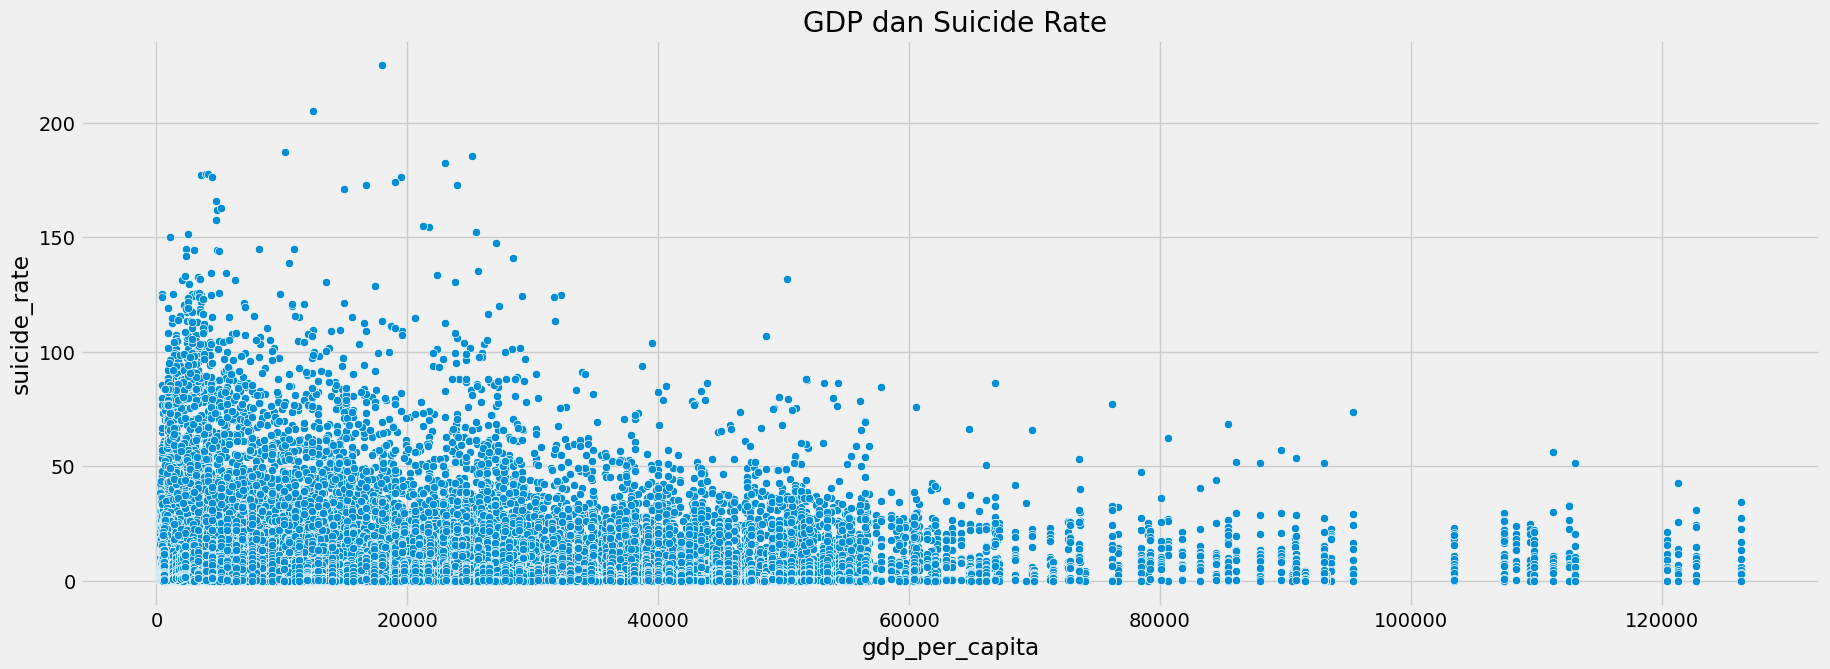

In [41]:
fig = plt.figure(figsize=(20,7))
ax=sns.scatterplot(data=df, x='gdp_per_capita', y='suicide_rate')
ax.set_title(' GDP dan Suicide Rate')

In [ ]:
Hubungan antara "gdp_per_capita" dan "suicides_rate" tidak linier. Oleh karena itu, GDP bukanlah sesuatu yang memiliki dampak nyata pada tingkat bunuh diri. Jadi negara yang kaya tidak bisa menentukan bahwa tingkat bunuh diri masyarakatnya rendah. Selanjutnya akan dianalisis korelasi antara GDP dan suicide rate.

In [42]:
df_suino = df.groupby(["country","year"])["suicides_no"].sum()
df_sum = df_suino.sort_index(ascending=True)[:] * 100

df_pop = df.groupby(["country","year"]).population.sum()
df_pop_sum = df_pop.sort_index(ascending=False)[:]

df_total = df_sum / df_pop_sum
df_total.head(10)

country  year
Albania  1987    0.002694
         1988    0.002279
         1989    0.002426
         1992    0.001665
         1993    0.002600
         1994    0.001755
         1995    0.003031
         1996    0.003027
         1997    0.005710
         1998    0.005112
dtype: float64

In [43]:
country_dict={}
for country in df_total.index.get_level_values(0):
    if country not in country_dict.keys():
        country_dict[country] = df_total[country].mean()
    else:
        pass

tup = list(country_dict.items())
tup.sort(key= lambda pair:pair[1], reverse = True)

country_list = [a[0] for a in tup]
country_suicide = [a[1] for a in tup]

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:181: RuntimeWarning:

invalid value encountered in double_scalars

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:195: RuntimeWarning:

invalid value encountered in sqrt

/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_mstats_common.py:198: RuntimeWarning:

invalid value encountered in double_scalars



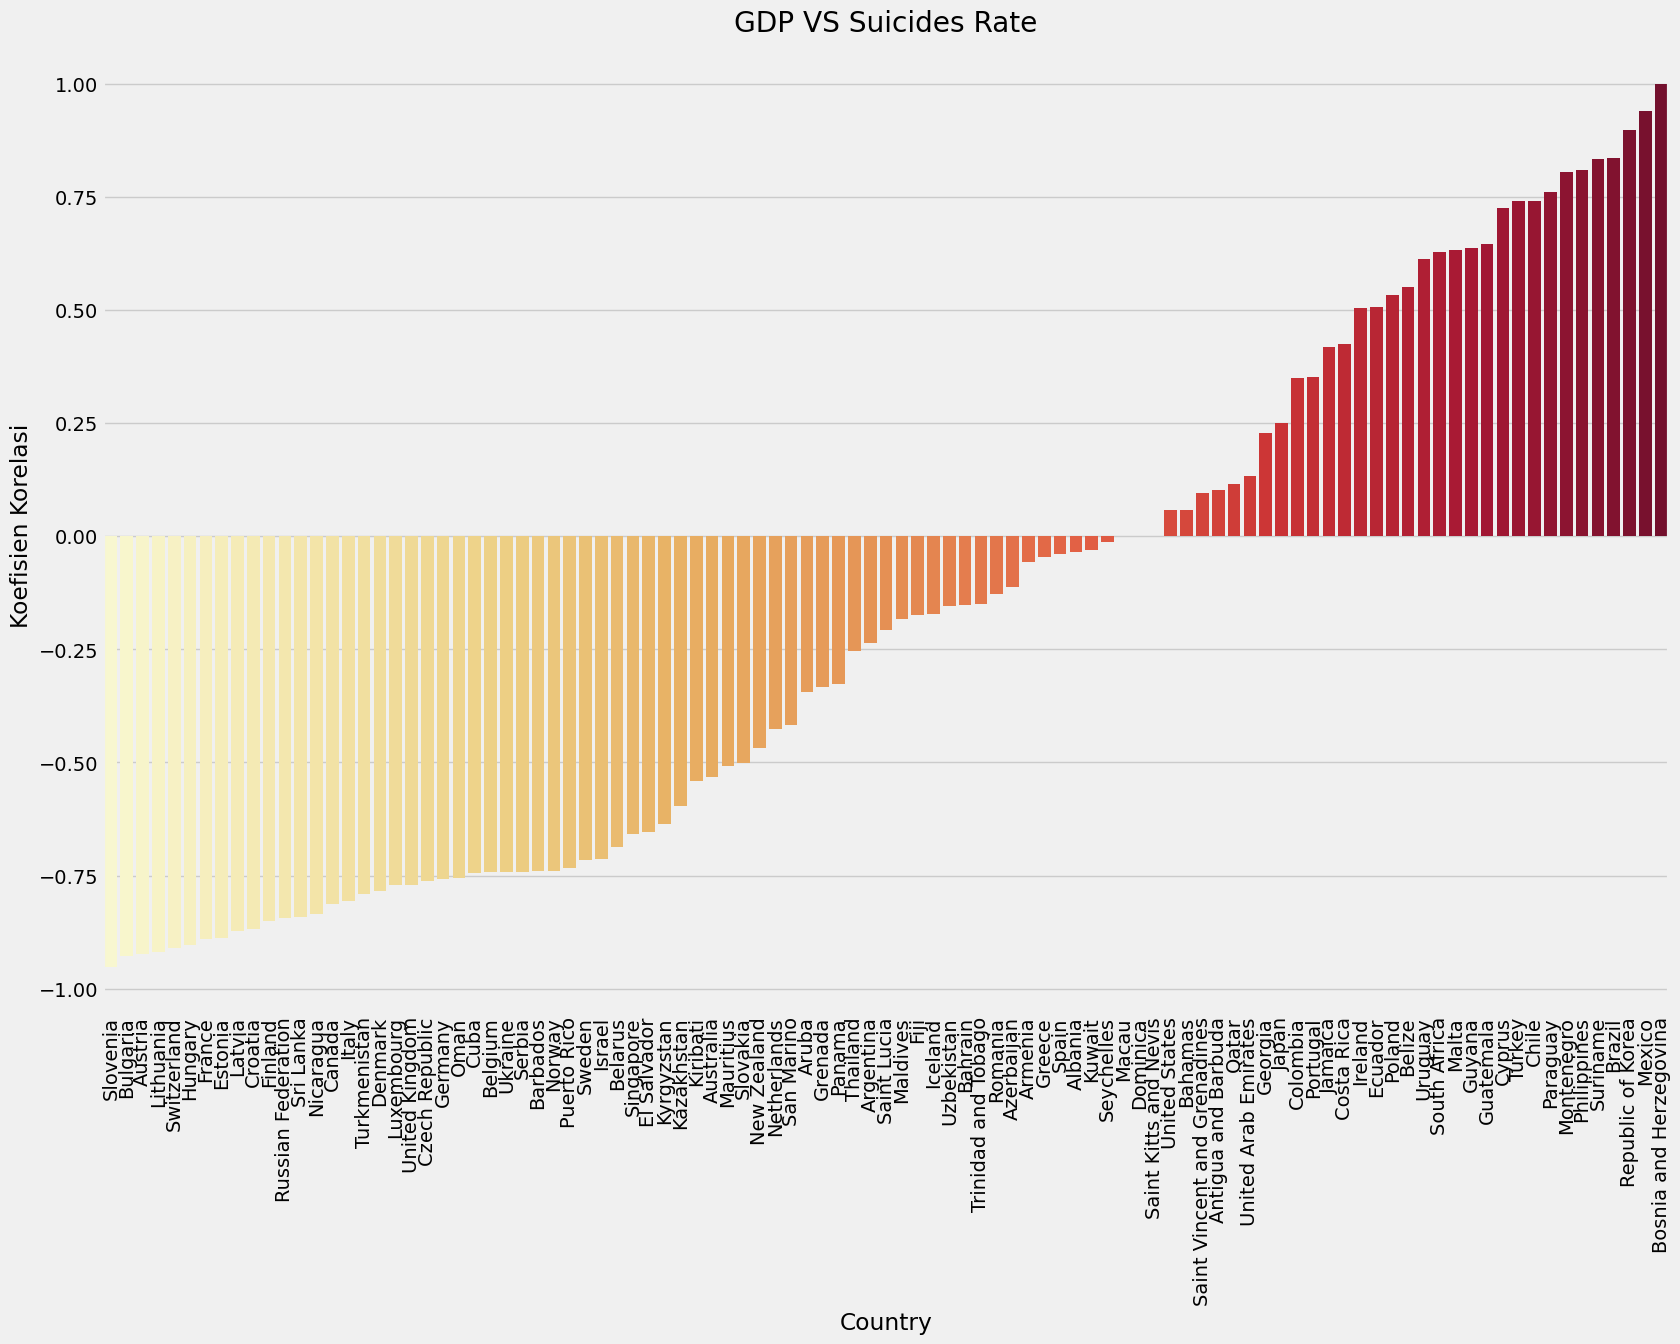

In [44]:
df_gdp = df.groupby(["country","year"]).gdp_per_capita.mean()
corr_eff = {}
p_value_eff = {}
for country in country_list[:]:
    slope, intercept, r_value, p_value, std_err = stats.linregress(df_gdp[country].values, df_total[country].values)
    corr_eff[country] = float(r_value)
    p_value_eff[country] = float(p_value)

gdp_tup = list(corr_eff.items())
gdp_tup.sort(key= lambda pair:pair[1], reverse = False)
dgp_relation = {a[0]:a[1] for a in gdp_tup}

plt.figure(figsize=(18,12))
sns.barplot(x=list(dgp_relation.keys()), y=list(dgp_relation.values()), palette = "YlOrRd")
plt.xticks(rotation = 90)
plt.xlabel("Country")
plt.ylabel("Koefisien Korelasi")
plt.title("GDP VS Suicides Rate")
plt.show()

Banyak negara yang memiliki korelasi negatif antara tingkat bunuh diri dengan gdp_per_capita tapi ada juga negara yang memiliki korelasi positif antara tingkat bunuh diri dengan gdp_per_capita. Oleh karena itu dapat kami simpulkan bahwa tingkat GDP sebuah negara tidak mempengaruhi tingkat bunuh diri masyarakatnya secara signifikan.

## KESIMPULAN

1. Secara umum, tingkat bunuh diri jauh lebih tinggi pada pria. Tingkat bunuh diri untuk pria kira-kira 3 sampai 4 kali tingkat bunuh diri untuk wanita. Tingkat bunuh diri untuk pria dan wanita adalah yang tertinggi pada tahun 1995 dan telah mengalami penurun sejak itu. Pada tahun 2015, angka bunuh diri mengalami penurunan yang hampir sama dengan sekitar tahun 1988 hingga 1991.
2. Secara global, tingkat bunuh diri tumbuh seiring dengan bertambahnya kelompok usia dengan 5-14 (kelompok usia termuda dalam data) memiliki tingkat bunuh diri terendah sedangkan kelompok usia 75+ memiliki yang tertinggi. Untuk generasi, persebarannya sedikit berbeda dengan generasi pendiam yang memiliki angka bunuh diri tertinggi. 
3. Berdasarkan hasil analisis diatas adapun faktor faktor yang mempengaruhi tingkat bunuh diri adalah gender dan usia sementara untuk GDP tidak dapat di katakan menjadi faktor yang mempengaruhi tingkat bunuh diri secara signifikan karena masih ada negara-negara dengan GDP yang tinggi tetapi banyak juga orang yang melakukan bunuh diri. Selain itu, tidak ada cukup data yang tersedia untuk analisis yang lebih baik, karena ada faktor biologis, psikologis, dan sosial lain yang dapat menyebabkan bunuh diri (ras, etnis, isolasi sosial, penularan, agama, dll.), serta geografis (iklim).
4. Ada juga beberapa negara yang  memiliki perubahan PDB per tahun dan angka bunuh diri  korelasi positif  yang sangat kuat. Namun, perlu diingat bahwa korelasi tidak menyiratkan sebab-akibat, dan tentu saja ada banyak faktor yang mendasari peningkatan angka bunuh diri. Dapat kita lihat dari artikel berikut ini (https://www.popbela.com/relationship/single/bela1/6-faktor-paling-umum-penyebab-seseorang-melakukan-aksi-bunuh-diri/2/full) beberaoa fakto yang menyebabkan seseorang bunuh diri adalah:
   1. Gangguan mental
   2. Depresi
   3. Bullying
   4. Kecanduan narkotika
   5. Masalah keuangan
   6. Masalah asmara


## SOLUSI

1. menumbuhkan kecakapan hidup sosio-emosional. Pemerintah dapat memberlakukan kebijakan untuk melakukan  sosialisasi mengenai bunuh diri melalui media massa serta melalui sekolah sekolah ataupun universitas.
2. Pemerintah Membuat batasan terhadap akses yang dapat mengakibatkan tindakan bunuh diri (seperti senjata api, racun, dll)
3. mempermudah masyarakat untuk mengakses fasilitas kesehatan untuk konsultasi kesehatan mental dan psikologis, serta mengajak masyarakat untuk mengubah mindset bahwa  psikiater hanya diperuntukkan untuk orang yang tidak waras.
4. Mengurangi jumlah jam kerja, karena jumlah bunuh diri di rentang usia 35-54 yang adalah usia bekerja  merupakan jumlah bunuh diri terbanyak, dengan harapan pengurangan jam kerja membuat pekerja lebih rileks dan tidak stress.